
# E-Commerce Consulting

### Aim

Help an e-commerce company decide whether to focus their efforts more on their website experience or on their mobile app experience.

### Dataset

`/input/customers.csv`

### Information about the dataset

- Each observation in the dataset is information about customers.
- **Avg. Session Length:** Average session of in-store style advice sessions.
- **Time on App:** Average time spent on App in minutes.
- **Time on Website:** Average time spent on Website in minutes.
- **Length of Membership:** How many years the customer has been a member. 

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Importing the data

In [2]:
customers = pd.read_csv('input/customers')

In [3]:
customers.shape

(500, 8)

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

From now on we will only be using the numerical data of the csv file.
___
Compare the yearly amount spent by customer against the time spent on website:

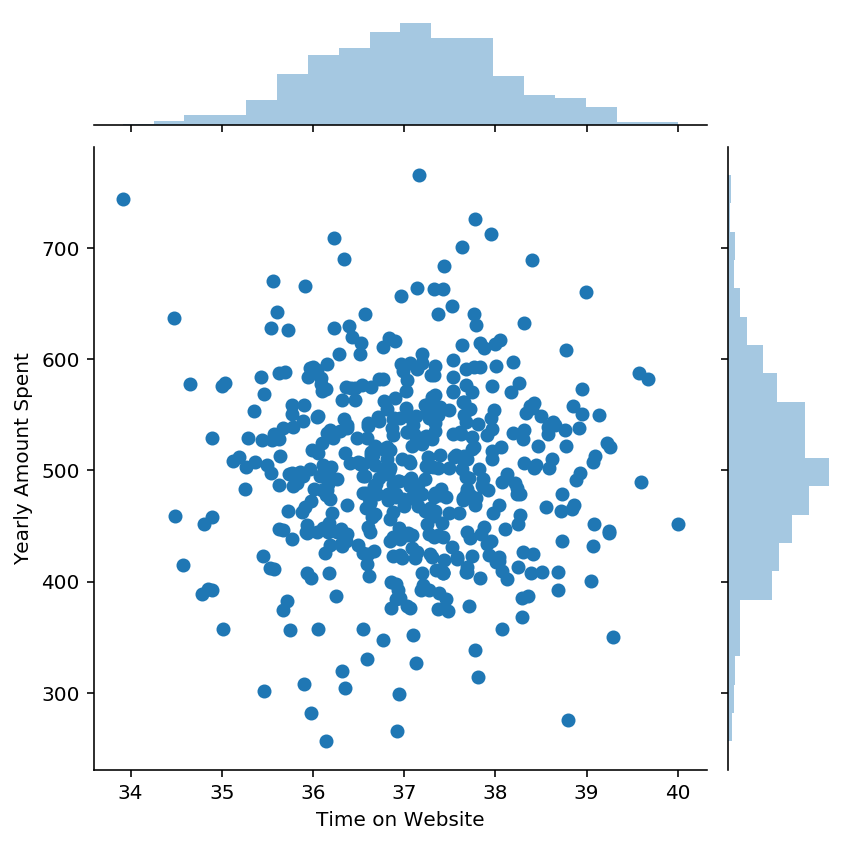

In [7]:
sns.jointplot('Time on Website', 'Yearly Amount Spent', data=customers)
plt.savefig('jp1', dpi=200)

Compare the yearly amount spent by customer against the time spent on mobile app:

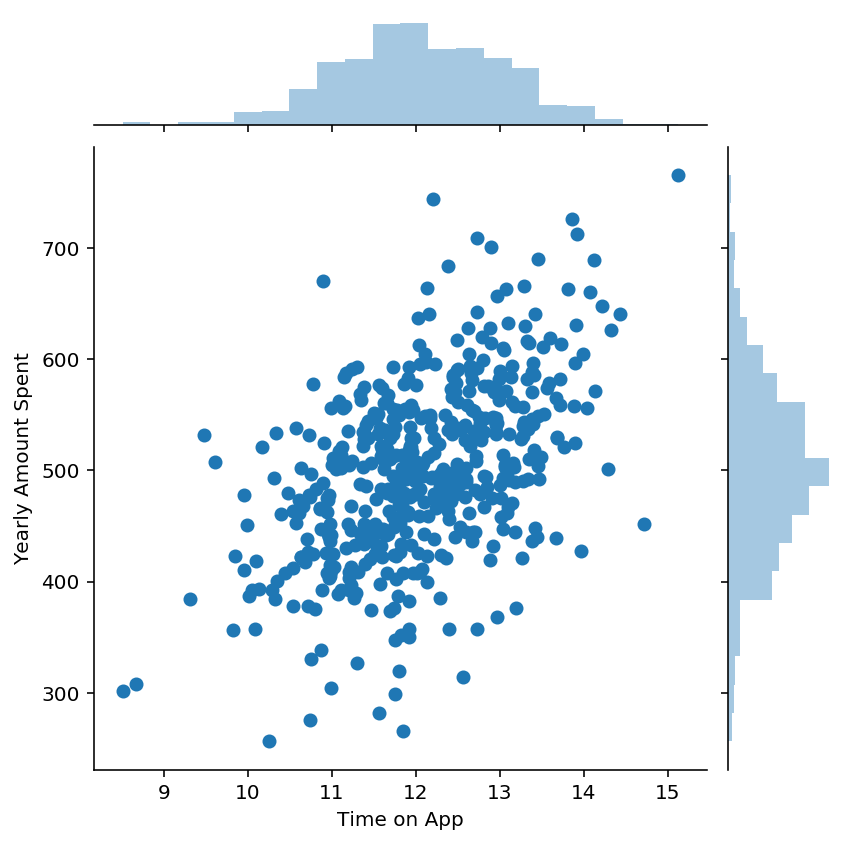

In [8]:
sns.jointplot('Time on App', 'Yearly Amount Spent', data=customers)
plt.savefig('jp2', dpi=200)

There seems to be more of a correlation here.
____
Create a jointplot of length of membership against the time spent on mobile app:

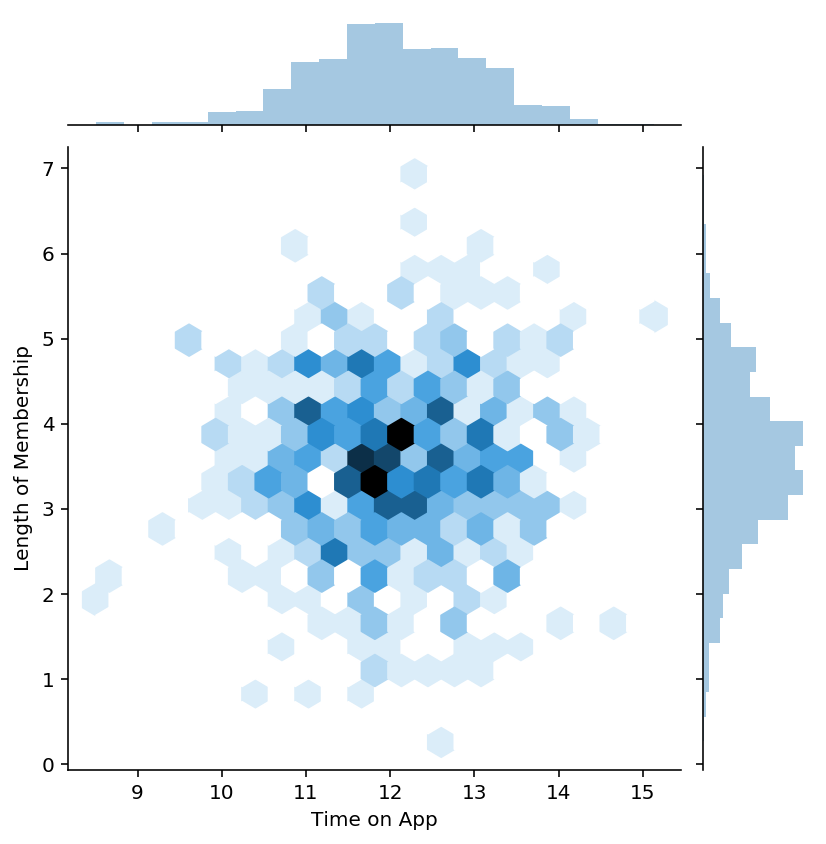

In [9]:
sns.jointplot('Time on App', 'Length of Membership', data=customers, kind='hex')

Explore relationships across all columns using pairplot:

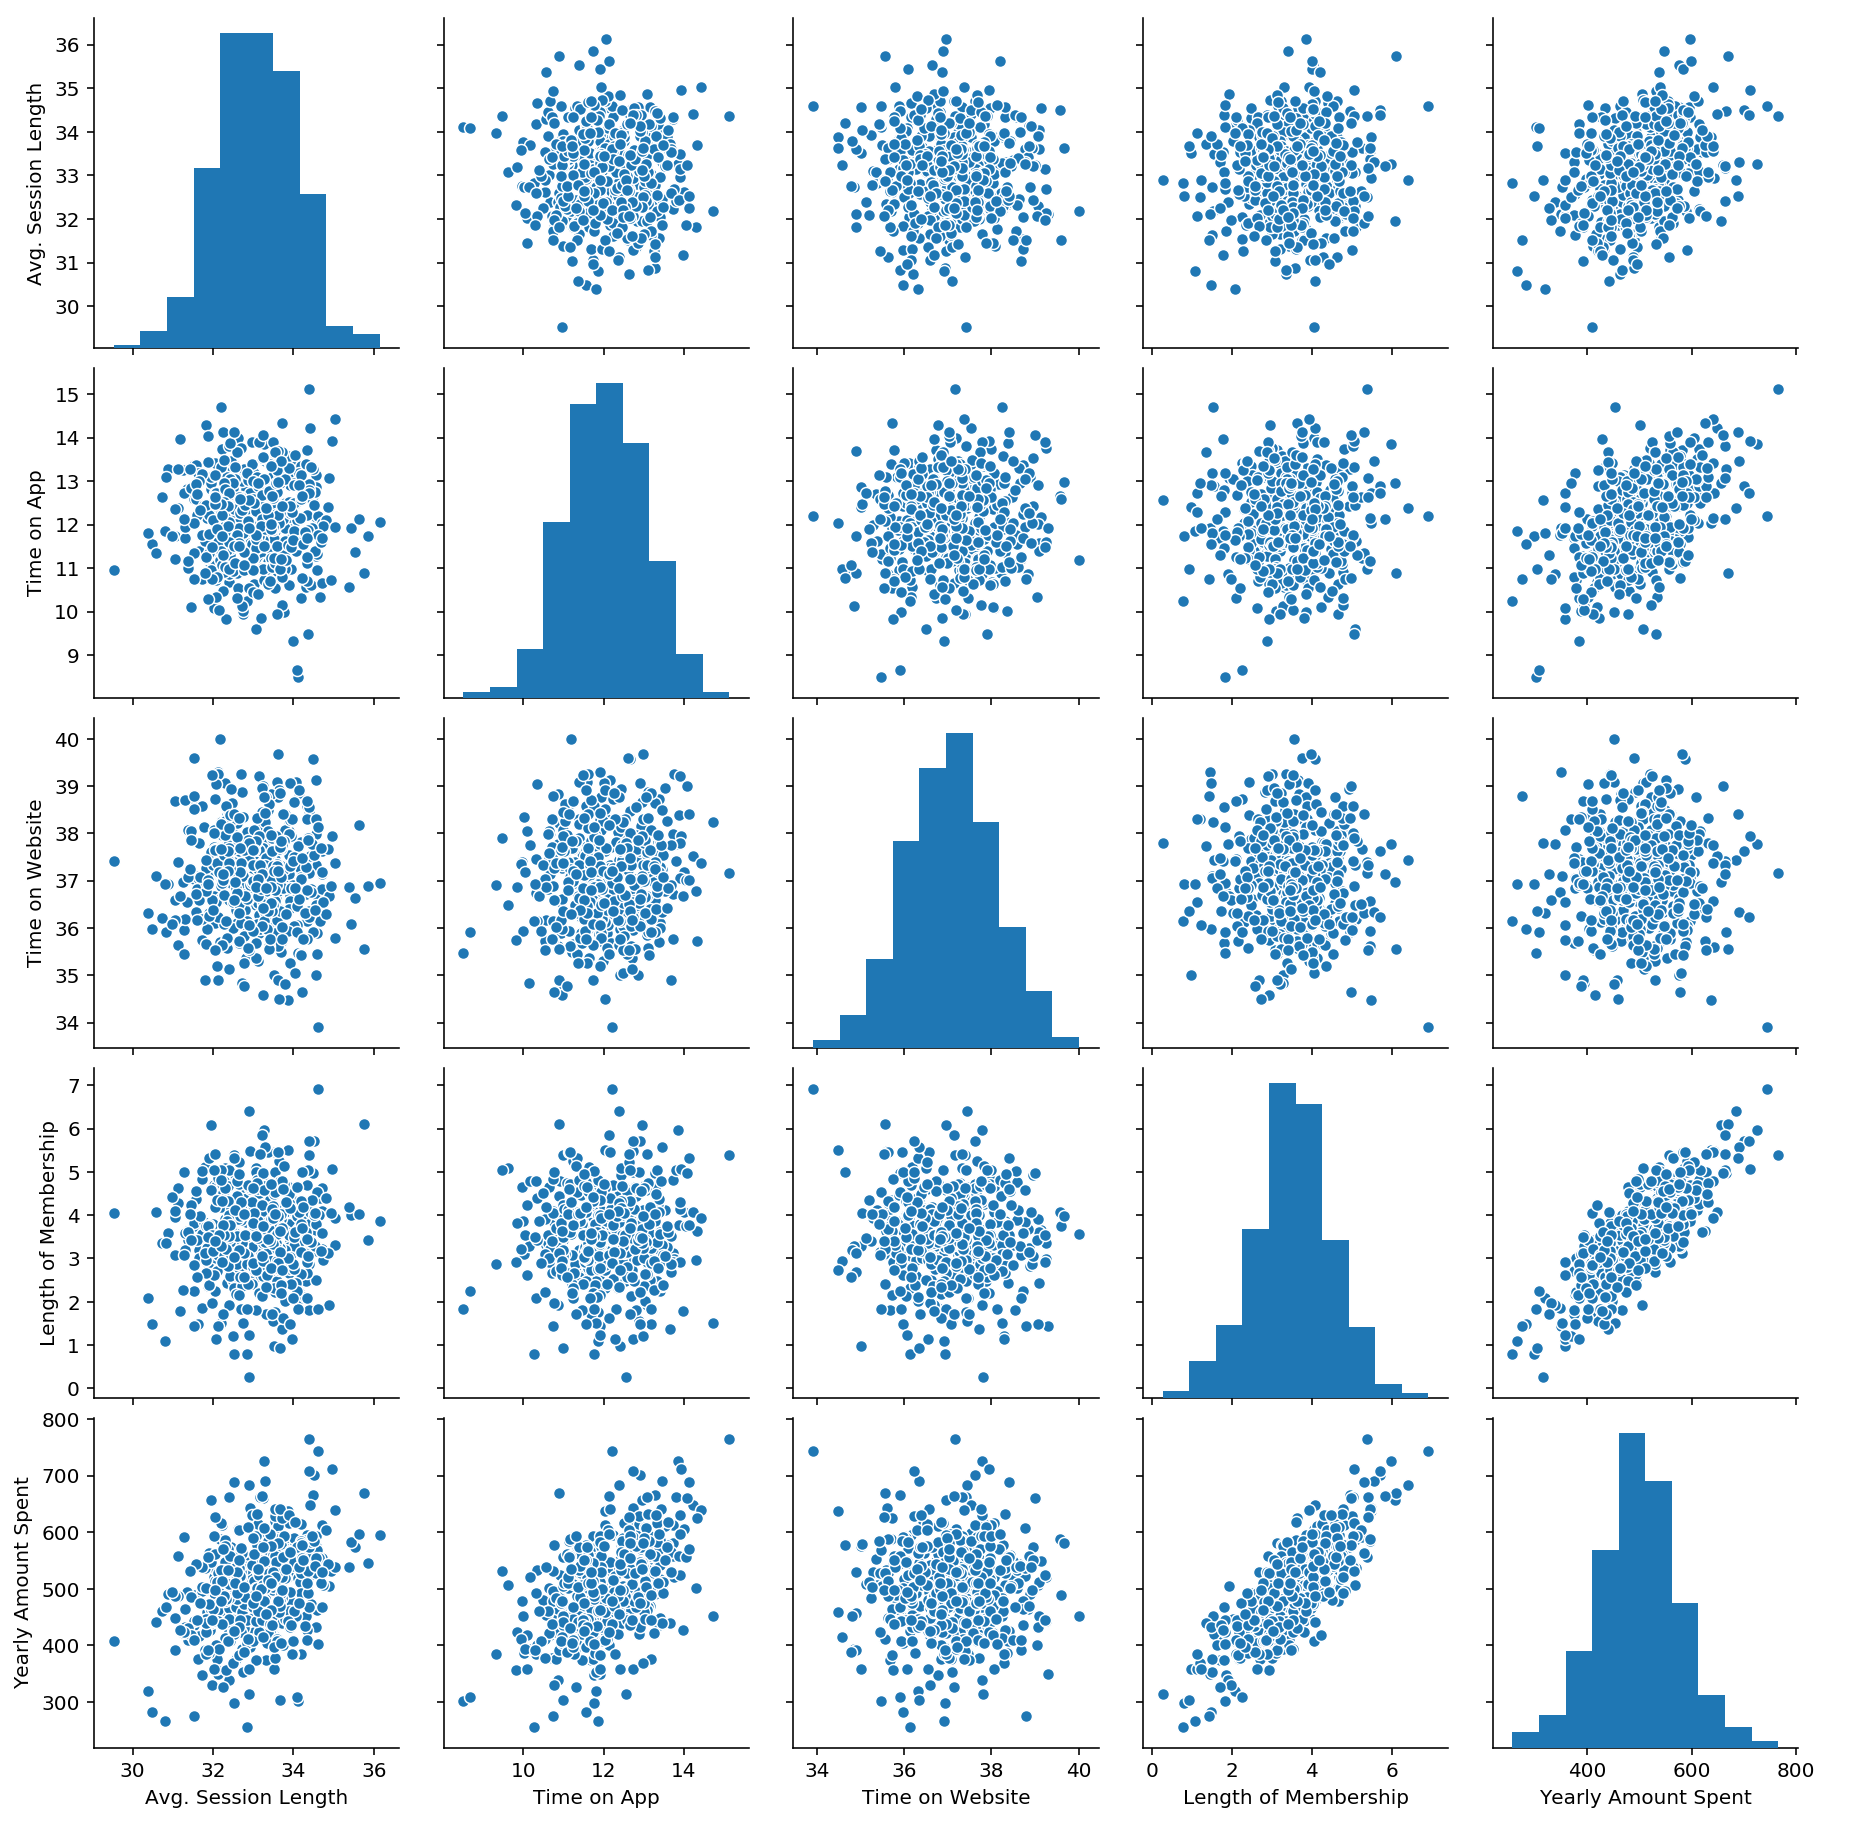

In [10]:
sns.pairplot(customers)
plt.savefig('pp', dpi=200)

Looks like the length of membership is the most correlated feature with the yearly amount spent.
___
Create a linear model plot of membership length against the yearly amount spent using a lmplot:

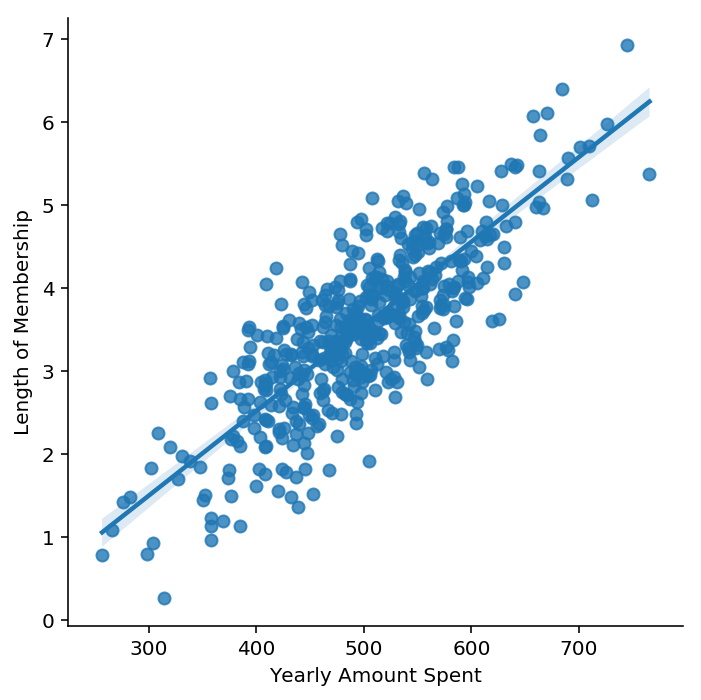

In [11]:
sns.lmplot('Yearly Amount Spent', 'Length of Membership', data=customers)
plt.savefig('lmplot', dpi=200)

Separate data into X and y:

In [12]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers[['Yearly Amount Spent']]

## Normalization

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
X_scaled = scaler.transform(X)

In [17]:
df_X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
df_X_scaled.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,1.456351,0.607280,2.493589,0.550107
1,-1.136502,-0.949464,0.206556,-0.870927
2,-0.052723,-0.727139,0.049681,0.572067
3,1.263010,1.676390,-0.335978,-0.413996
4,0.279838,0.747770,0.471737,0.914422


## Train-test-split
Test size: 30%

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_X_scaled, y, test_size=0.3, random_state=101)

## Build and train model

Linear regression model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Print out the coefficients of the model

In [23]:
print(lm.coef_)

[[25.76252659 38.32855202  0.19220992 61.17355707]]


## Predictions

In [24]:
predictions = lm.predict(X_test)

Create a scatterplot of the real test values versus the predicted values

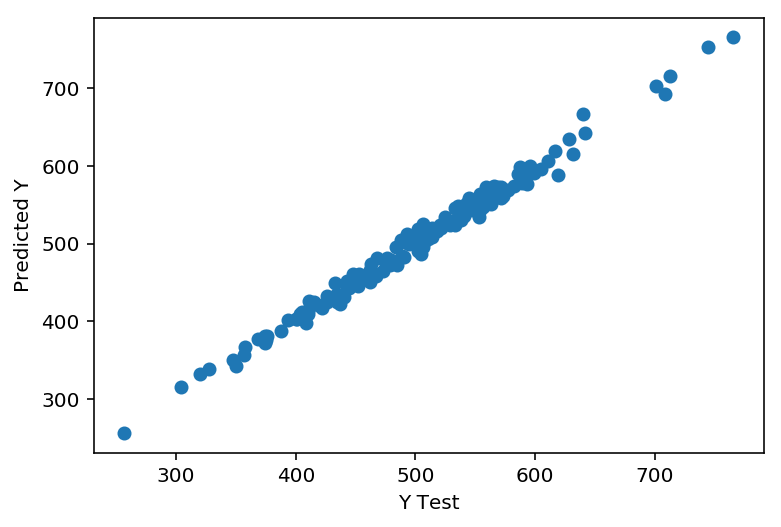

In [25]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.savefig('scatter', dpi=200)

## Evaluation

- Mean-absolute error
- Mean-squared error
- Root-mean-squared error

In [26]:
from sklearn import metrics

In [27]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 7.228148653430841
MSE: 79.81305165097469
RMSE: 8.933815066978648


## Residuals 

Plot a histogram of the residuals and make sure it looks normally distributed:

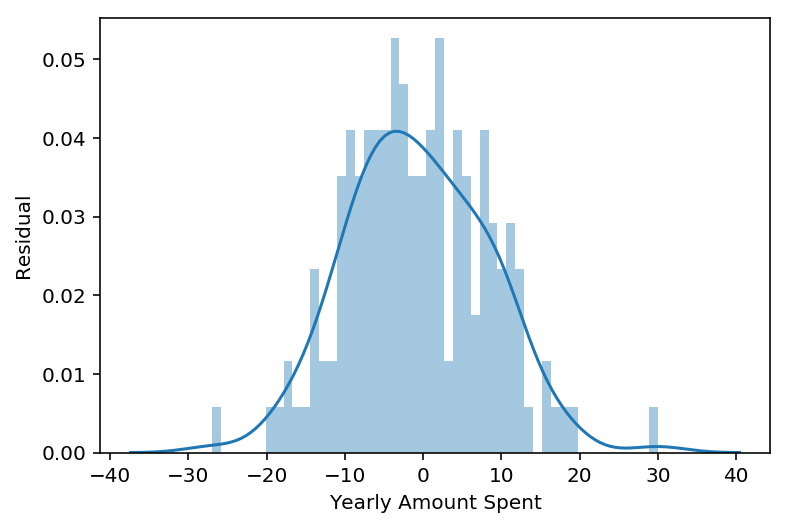

In [28]:
sns.distplot(y_test-predictions, bins=50, kde=True)
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Residual')
plt.savefig('resid', dpi=200)

## Solution to original problem

We can find the answer by comparing the influence of both options (time spent on the website and time spent on the mobile app) on the yearly amount spent by customer.

In [29]:
coeffs = pd.DataFrame(data=lm.coef_.transpose(), index=X.columns, columns=['Coefficient'])
coeffs

,Coefficient
Avg. Session Length,25.762527
Time on App,38.328552
Time on Website,0.192210
Length of Membership,61.173557


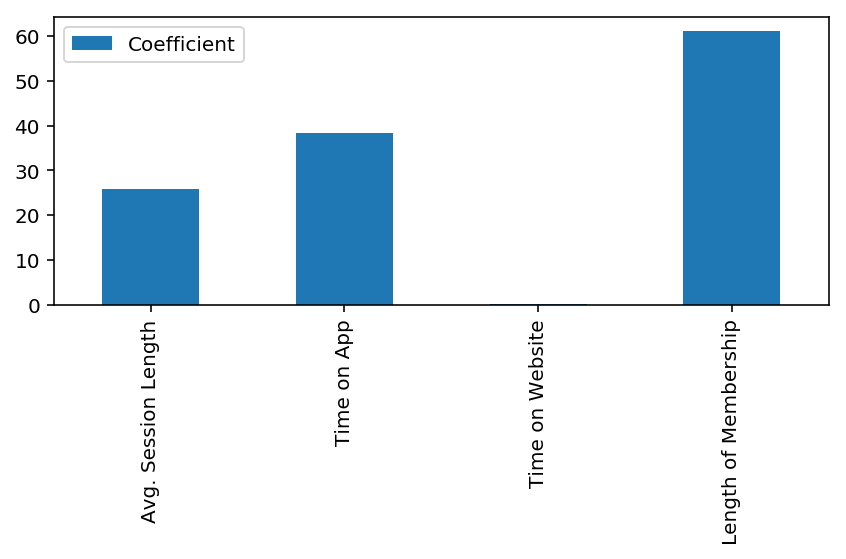

In [30]:
coeffs.plot(kind='bar')
plt.tight_layout()
plt.savefig('coeffs', dpi=200)

## Conclusion
**From our analysis, the company should focus more on their mobile app.**